In [18]:
import create_matrix
import pandas as pd 
from nltk import sent_tokenize, word_tokenize, PorterStemmer
import matplotlib.pyplot as plt
import re
import string
from functools import reduce
import math
from math import log
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster
from sklearn.cluster import KMeans
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords   
from nltk.cluster import KMeansClusterer
import numpy as np 
from nltk.cluster.util import cosine_distance
import nltk
import numpy as np
from operator import itemgetter
import featureExtraction, preprocessing, settings, readfile
import os
import glob
import errno
import sys

import json

In [19]:
 _, doc = readfile.FileReader("/home/pham.thi.hoa/PycharmProjects/base.vn/textrank/Plaintext/CT/CT01.txt").read_file()
        # print(title)
sentences = preprocessing.NLP(doc).sentence_segmentation()
total_documents = len(sentences)
print(total_documents, end="\n")
freq_matrix = create_matrix.Create_frequency_matrix(sentences)
tf_matrix = create_matrix.Create_tf_matrix(freq_matrix)
count_doc_per_words = create_matrix.Create_documents_per_words(freq_matrix)
# Calculate IDF and generate a matrix
idf_matrix = create_matrix.Create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
# print(idf_matrix)

# 6 Calculate TF-IDF and generate a matrix
tf_idf_matrix = create_matrix.Create_tf_idf_matrix(tf_matrix, idf_matrix)
# print(tf_idf_matrix)


sentence_scores = create_matrix.Score_sentences(tf_idf_matrix)

12


---------------------------------------------------------------------------
(12, 240)


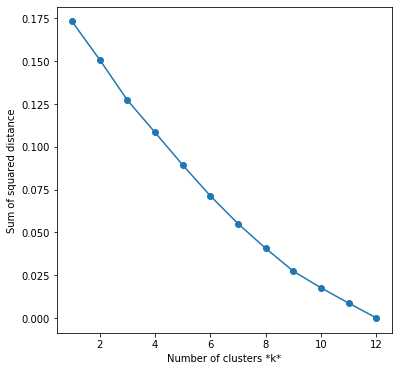

In [20]:
df = pd.DataFrame(tf_idf_matrix)
df = df.T
df.replace(np.nan,0,inplace=True)
x = df.values

print("---------------------------------------------------------------------------")
x.shape
print(x.shape)
sse = []
list_k = list(range(1, 13))


for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
    format(k)
    format(km.inertia_)
    # print("Number of cluster2: {}".format(k), end=" ")
    # print("Value of SSE/Distortion: {}".format(km.inertia_))

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()  
# Apply clustering on the data using sklearn KMeans

In [21]:
from IPython.display import display, HTML

In [22]:
kmeans = cluster.KMeans(n_clusters=7, init='k-means++',
                            max_iter=100, n_init=1, verbose=0, random_state=3425)
kmeans.fit(x)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels
centroids.shape        
lbl = pd.DataFrame(labels, columns=["label"])
final_df = df
final_df['cluster'] = lbl.values
test = (final_df == 0).astype(int).sum(axis=1)
test_df = pd.DataFrame(test)

test_df['total'] = 1
test_df['not_null'] = test_df['total'] - test_df[0]

test_df['cluster'] = final_df['cluster']

test_df.rename(columns={0:"blank_columns"}, inplace=True)
display(test_df)
print('___________________________________________')
# display(final_df)
x = pd.DataFrame(test_df.groupby('cluster')['not_null'].sum())
x.rename(columns={"not_null":"Occurrence"}, inplace=True)
# print(x)

y = pd.DataFrame(test_df.groupby('cluster')['not_null'].count())
y.rename(columns={"not_null":"Not_null_rows"}, inplace=True)
# print(y)

frequency_df_temp = pd.concat([x , y], axis=1)

frequency_df_temp["frequency"] = frequency_df_temp["Occurrence"]/(frequency_df_temp["Not_null_rows"]*163    )
print(frequency_df_temp)

frequency_df_temp[frequency_df_temp["frequency"] == max(frequency_df_temp["frequency"])].index[0]
df1 = final_df[final_df.cluster == frequency_df_temp[frequency_df_temp["frequency"] == max(frequency_df_temp["frequency"])].index[0]]
final_dict = df1.set_index(df1.T.columns).T.to_dict('list')
display(final_dict.keys())
# print(sentence_scores)

l = {}
for i in final_dict.keys():
    for j in sentence_scores.keys():
        if i == j:
            l[i] = 1
# print(l)


,blank_columns,total,not_null,cluster
"Bên cạnh đó, tỉ",187,1,-186,4
Hiện nay tỉnh đ,196,1,-195,3
Ngoài ra khi đư,196,1,-195,4
"Ngày 11/4, Đại",203,1,-202,4
Phía Nga luôn ư,179,1,-178,4
Theo quy hoạch,204,1,-203,5
Tại buổi làm vi,206,1,-205,6
Tỉnh Ninh Thuận,171,1,-170,0
Tỉnh cũng đã ho,184,1,-183,3
Tỉnh cũng đã th,214,1,-213,2


___________________________________________
         Occurrence  Not_null_rows  frequency
cluster                                      
0              -170              1  -1.042945
1              -227              1  -1.392638
2              -213              1  -1.306748
3              -378              2  -1.159509
4              -977              5  -1.198773
5              -203              1  -1.245399
6              -205              1  -1.257669


dict_keys(['Tỉnh Ninh Thuận'])